### This script contains the following:
#### 1. Import libraries and data
#### 2. Data cleaning
#### 3. Visualizing variables for potential analysis
#### 4. Regression analysis
    4.1 Regression Analysis on hypothesis
    4.2 Regression Analysis on sqft_living of all homes vs price

### 1. Import libraries and data

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [4]:
# Import data

path = r'C:\Users\ashle\Documents\08-2024 King County, Washington_House Sales Analysis'

house_sales = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'house_data_cleaned_new_variables.csv'))

### 2. Data cleaning

In [6]:
house_sales.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price_per_sqft', 'house_age',
       'years_since_renovation', 'price_category', 'grade_category'],
      dtype='object')

In [7]:
house_sales.shape

(21612, 25)

In [8]:
house_sales.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1  2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2  2015-02-25  180000.0         2       1.00          770     10000     1.0   
3  2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4  2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  zipcode      lat     long  sqft_living15  \
0           0     0          3  ...    98178  47.5112 -122.257           1340   
1           0     0          3  ...    98125  47.7210 -122.319           1690   
2           0     0          3  ...    98028  47.7379 -122.233           2720   
3           0     0          5  ...    98136  47.5208 -122.393           1360   
4           0     0          3  ...    98074  47.6168 -122.045           1800   

   sqft_lot15  price_per_sqft  house_age  years_since_renovation  \
0        5650      188.050847         69                      69   
1        7639      209.338521         73                      33   
2        8062      233.766234         91                      91   
3        5000      308.163265         59                      59   
4        7503      303.571429         37                      37   

   price_category  grade_category  
0    Middle price    Middle Grade  
1    Middle price    Middle Grade  
2    Middle price    Middle Grade  
3    Middle price    Middle Grade  
4    Middle price    Middle Grade  

[5 rows x 25 columns]

This has been done in another script. Data is clean.  

### 3. Visualizing variables for potential analysis

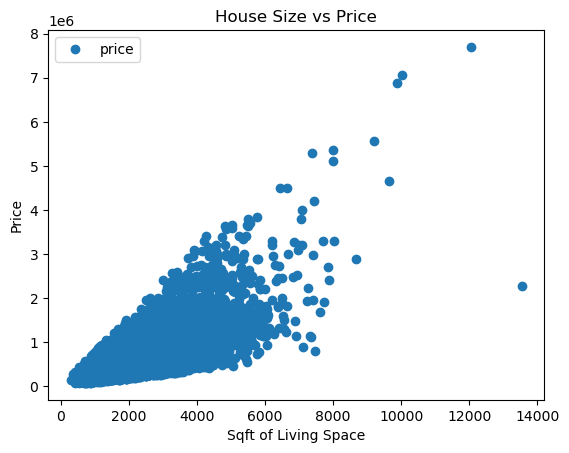

In [11]:
# Scatterplot of variables to analyze

house_sales.plot(x = 'sqft_living', y = 'price', style = 'o')
plt.title('House Size vs Price')
plt.xlabel('Sqft of Living Space')
plt.ylabel('Price')
plt.show()

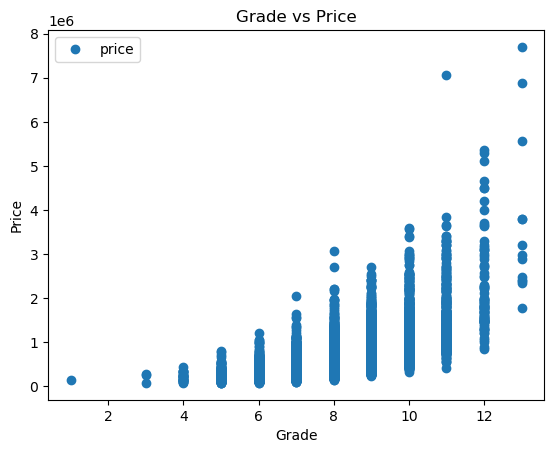

In [12]:
# Scatterplot of variables to analyze

house_sales.plot(x = 'grade', y = 'price', style = 'o')
plt.title('Grade vs Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

### 4. Regression analysis

#### 4.1 Regression Analysis on hypothesis 1

**Hypothesis:** If the square footage of living space and the grade of a home are high, then the house price will also be high.

In [16]:
# Define variables

X1 = house_sales['sqft_living'] # Independent variable
y1 = house_sales['price'] # Dependent variable

In [17]:
# Convert the variables into arrays

X1 = house_sales['sqft_living'].values.reshape(-1,1)
y1 = house_sales['price'].values.reshape(-1,1)

In [18]:
# Split the data into two sets: a training set and a test set.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state=0)

In [19]:
# Create regression object
regression1 = LinearRegression()

In [20]:
# Fit the regression oject to the training set
regression1.fit(X1_train, y1_train)

LinearRegression()

In [21]:
# Create a prediction for y on the test set
y1_predicted = regression1.predict(X1_test)

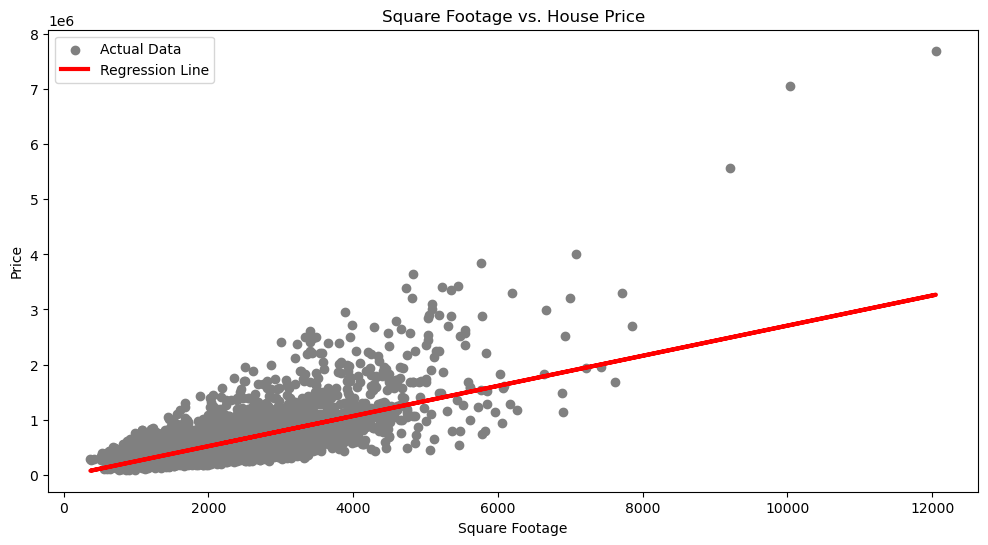

In [22]:
# Plot the model

plt.figure(figsize=(12, 6))
plt.scatter(X1_test, y1_test, color='grey', label='Actual Data')
plt.plot(X1_test, y1_predicted, color='red', linewidth=3, label='Regression Line')
plt.title('Square Footage vs. House Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
# Pull model summary statistics for sqft_living vs Price
mse_1 = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error
rmse_1 = np.sqrt(mse_1) # This is the root square mean (same unit as the dependent variable 'price')
r2_1 = r2_score(y1_test, y1_predicted)

# Print summary stats
print('Slope:', regression1.coef_)
print('Root mean squared error:', rmse_1)
print('R2 score:', r2_1)

Slope: [[273.70843969]]
Root mean squared error: 269807.8879319988
R2 score: 0.5057892303219635


In [24]:
# Manual check
data = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data.head(25)

Actual     Predicted
0    900000.0  1.028569e+06
1    405000.0  3.196637e+05
2    780000.0  9.081369e+05
3    379950.0  6.842434e+05
4   1061600.0  7.877051e+05
5    627000.0  5.249450e+05
6    279000.0  5.358934e+05
7    453000.0  4.674663e+05
8    290000.0  3.689312e+05
9    792000.0  8.780289e+05
10   750000.0  7.931793e+05
11   272925.0  3.196637e+05
12   661000.0  4.264100e+05
13  1000000.0  1.247535e+06
14   394000.0  6.672734e+05
15   418200.0  5.878980e+05
16  1075000.0  6.754847e+05
17   937500.0  1.121629e+06
18   328000.0  5.829712e+05
19   449950.0  3.963021e+05
20   405000.0  4.510438e+05
21   272000.0  4.592550e+05
22   480000.0  6.070576e+05
23   619420.0  6.399026e+05
24   303000.0  4.756775e+05

**Insights:**

Slope: 273.71
- This indicates that for each additional square foot of living space, the price increases by approximately \$273.71 on average. This demonstrates a positive relationship between square footage and house price.

Root Mean Squared Error (RMSE): 269,807.89
- Similar to the previous model, a high RMSE indicates variability in price predictions based on square footage.

R² Score: 0.51
- An R² score of 0.51 suggests that around 51% of the variance in house prices can be explained by the square footage of living space. This is a slightly stronger relationship than with grade alone but still indicates that other factors are influencing price.

##### Grade vs Price

In [27]:
# Define variables

X2 = house_sales['grade'] # Independent variable
y2 = house_sales['price'] # Dependent variable

In [28]:
# Convert the variables into arrays

X2 = house_sales['grade'].values.reshape(-1,1)
y2 = house_sales['price'].values.reshape(-1,1)

In [29]:
# Split the data into two sets: a training set and a test set.
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state=0)

In [30]:
# Create regression object
regression2 = LinearRegression()

In [31]:
# Fit the regression oject to the training set
regression2.fit(X2_train, y2_train)

LinearRegression()

In [32]:
# Create a prediction for y on the test set
y2_predicted = regression2.predict(X2_test)

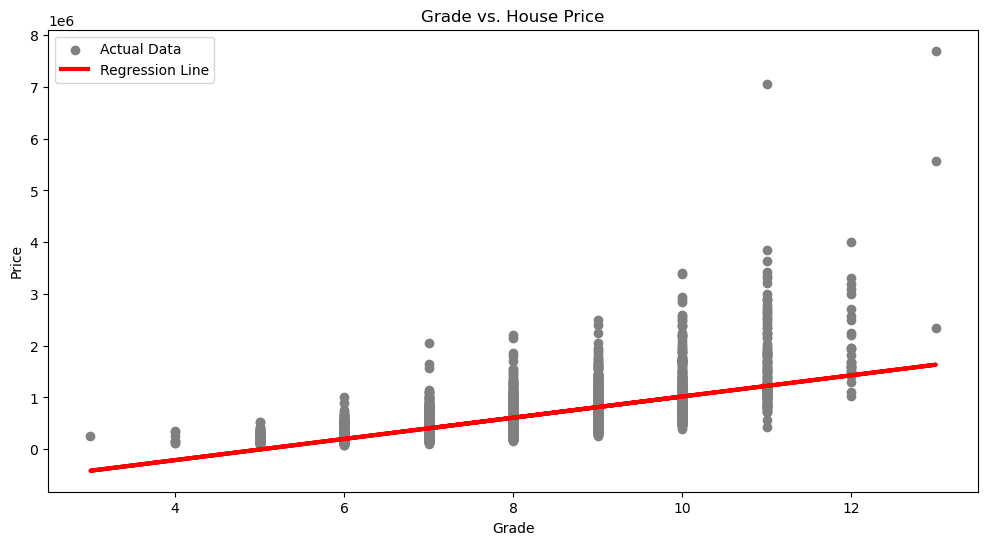

In [33]:
# Plot the model

plt.figure(figsize=(12, 6))
plt.scatter(X2_test, y2_test, color='grey', label='Actual Data')
plt.plot(X2_test, y2_predicted, color='red', linewidth=3, label='Regression Line')
plt.title('Grade vs. House Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
# Pull model summary statistics for Grade vs Price
mse_2 = mean_squared_error(y2_test, y2_predicted) # This is the mean squared error
rmse_2 = np.sqrt(mse_2) # This is the root square mean (same unit as the dependent variable 'price')
r2_2 = r2_score(y2_test, y2_predicted)

# Print summary stats
print('Slope:', regression2.coef_)
print('Root mean squared error:', rmse_2)
print('R2 score:', r2_2)

Slope: [[204864.54620209]]
Root mean squared error: 286486.0160449935
R2 score: 0.442801707748554


In [36]:
# Manual check
data = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data.head(25)

Actual     Predicted
0    900000.0  1.018821e+06
1    405000.0  4.042272e+05
2    780000.0  8.139563e+05
3    379950.0  6.090917e+05
4   1061600.0  1.018821e+06
5    627000.0  6.090917e+05
6    279000.0  4.042272e+05
7    453000.0  4.042272e+05
8    290000.0  4.042272e+05
9    792000.0  1.018821e+06
10   750000.0  1.018821e+06
11   272925.0  1.993626e+05
12   661000.0  6.090917e+05
13  1000000.0  1.223685e+06
14   394000.0  4.042272e+05
15   418200.0  8.139563e+05
16  1075000.0  6.090917e+05
17   937500.0  1.018821e+06
18   328000.0  6.090917e+05
19   449950.0  4.042272e+05
20   405000.0  4.042272e+05
21   272000.0  6.090917e+05
22   480000.0  6.090917e+05
23   619420.0  8.139563e+05
24   303000.0  6.090917e+05

**Insights:**

Slope: 204,864.55
- This indicates that for each one-unit increase in the grade of the home, the price increases by approximately \$204,864 on average. This suggests a strong positive relationship between grade and house price.

Root Mean Squared Error (RMSE): 286,486.02
- RMSE gives an estimate of the standard deviation of the residuals (prediction errors). A high RMSE compared to the range of house prices indicates that the model has significant error and variability in predictions.

R² Score: 0.44
- An R² score of 0.44 suggests that about 44% of the variance in house prices can be explained by the grade of the home. While this indicates some predictive power, it also suggests that a considerable amount of variation remains unexplained, indicating that other factors likely contribute to house prices.

**Interpretation of results related to hypothesis:**

Both the grade and square footage of living space show positive relationships with house prices, which aligns with the hypothesis that higher values in these dimensions correspond to higher house prices.

While the slopes indicate a positive impact on price, the RMSE values show that predictions can vary significantly. The R² scores suggest that neither model fully captures the complexity of house pricing. Therefore, although square footage and grade positively correlate with price, they are not the only factors at play.

The hypothesis is supported by the regression analysis. Higher square footage and a higher grade do correlate with higher house prices, as evidenced by the positive slopes in both models. However, the moderate R² values also imply that other variables not included in these models likely contribute to house prices.

#### 4.2 Regression Analysis on hypothesis 2

**Hypothesis:** If the square footage of living space exceeds 3,000 sqft, then house prices will increase at an accelerated rate in urban areas compared to houses with less than 3,000 square feet of living space. 

In [40]:
# Split the data into subsets for houses <= 3000 sqft and > 3000 sqft
subset_small = house_sales[house_sales['sqft_living'] <= 3000]
subset_large = house_sales[house_sales['sqft_living'] > 3000]

In [42]:
## Convert the variables into arrays

# For houses <= 3000 sqft
X_small = subset_small[['sqft_living']].values.reshape(-1,1)
y_small = subset_small['price'].values.reshape(-1,1)

# For houses > 3000 sqft
X_large = subset_large[['sqft_living']].values.reshape(-1,1)
y_large = subset_large['price'].values.reshape(-1,1)

In [44]:
# Split the data into training and test sets

# For houses <= 3000 sqft
X_small_train, X_small_test, y_small_train, y_small_test = train_test_split(X_small, y_small, test_size = 0.3, random_state=0)

# For houses > 3000 sqft
X_large_train, X_large_test, y_large_train, y_large_test = train_test_split(X_large, y_large, test_size = 0.3, random_state=0)

In [46]:
# Create regression object
regression_small = LinearRegression()
regression_large = LinearRegression()

In [48]:
# Fit the models to the training data
regression_small.fit(X_small_train, y_small_train)
regression_large.fit(X_large_train, y_large_train)

LinearRegression()

In [50]:
# Make predictions
y_small_predicted = regression_small.predict(X_small_test)
y_large_predicted = regression_large.predict(X_large_test)

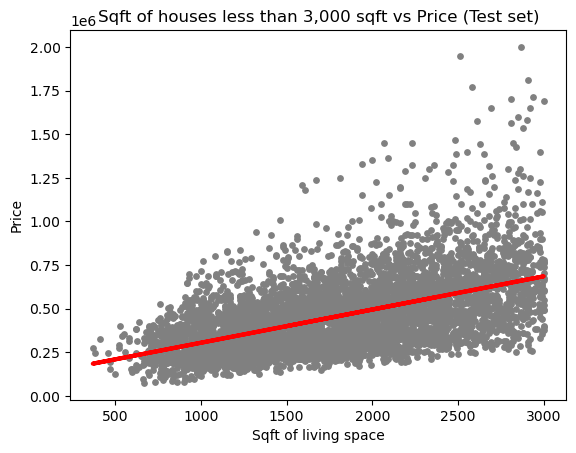

In [52]:
# Create a scatterplot to show the regression line for the 'small subset' (houses <= 3,000 sqft)

plot_small_test = plt
plot_small_test.scatter(X_small_test, y_small_test, color = 'grey', s=15)
plot_small_test.plot(X_small_test, y_small_predicted, color = 'red', linewidth=3)
plot_small_test.title('Sqft of houses less than 3,000 sqft vs Price (Test set)')
plot_small_test.xlabel('Sqft of living space')
plot_small_test.ylabel('Price')
plot_small_test.show()

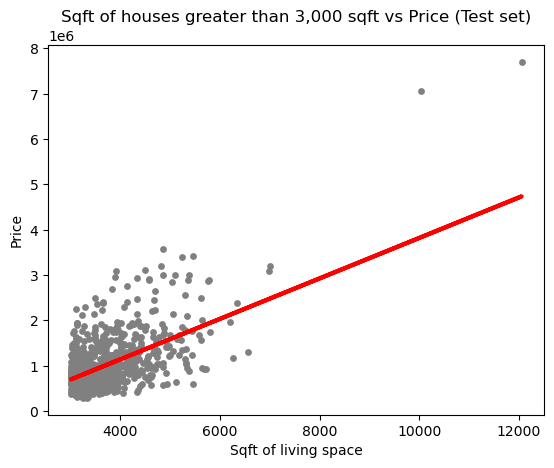

In [54]:
# Create a scatterplot to show the regression line for the 'large subset' (houses > 3,000 sqft)

plot_large_test = plt
plot_large_test.scatter(X_large_test, y_large_test, color = 'grey', s=15)
plot_large_test.plot(X_large_test, y_large_predicted, color = 'red', linewidth=3)
plot_large_test.title('Sqft of houses greater than 3,000 sqft vs Price (Test set)')
plot_large_test.xlabel('Sqft of living space')
plot_large_test.ylabel('Price')
plot_large_test.show()

**Insights:** 
- The scatterplots clearly show that the slope for houses larger than 3,000 sqft is steeper than for houses <= 3,000 sqft.
- While it's hard to say definitively if the 3,000 sqft threshold is the most accurate, we can observe that beyond this point, the rate of price increase accelerates. 
- For houses > 3,000 sqft, the regression line doesn’t fit as tightly. Though the slope is steeper, the points are more dispersed, indicating less precision in the predictions. The smaller number of houses in this category may contribute to the scatter and reduced accuracy.

In [57]:
# Pull model summary statistics for houses <= 3000 sqft
mse_small = mean_squared_error(y_small_test, y_small_predicted) # This is the mean squared error
rmse_small = np.sqrt(mse_small) # This is the root square mean (same units as the dependent variable 'price')
r2_small = r2_score(y_small_test, y_small_predicted)

# Print summary stats
print('Model Summary Statistics for Houses <= 3000 sqft')
print('Slope:', regression_small.coef_)
print('Root mean squared error:', rmse_small)
print('R2 score:', r2_small)

Model Summary Statistics for Houses <= 3000 sqft
Slope: [[190.32356608]]
Root mean squared error: 180805.77752536949
R2 score: 0.2647281359820498


In [59]:
# Pull model summary statistics for houses > 3000 sqft
mse_large = mean_squared_error(y_large_test, y_large_predicted)
rmse_large = np.sqrt(mse_large)
r2_large = r2_score(y_large_test, y_large_predicted)

# Print summary stats
print('Model Summary Statistics for Houses > 3000 sqft')
print('Slope:', regression_large.coef_)
print('Root mean squared error:', rmse_large)
print('R2 score:', r2_large)

Model Summary Statistics for Houses > 3000 sqft
Slope: [[446.12851978]]
Root mean squared error: 466163.42263683834
R2 score: 0.3946959620954643


In [61]:
# Manual check for houses <= 3000 sqft
data_small = pd.DataFrame({'Actual': y_small_test.flatten(), 'Predicted': y_small_predicted.flatten()})
data_small.head(25)

Actual      Predicted
0   315001.0  400254.873930
1   309950.0  402158.109591
2   409000.0  426900.173182
3   325000.0  463061.650737
4   650000.0  552513.726796
5   549000.0  440222.822807
6   465000.0  388835.459965
7   705000.0  685740.223053
8   736000.0  400254.873930
9   180000.0  322222.211836
10  475000.0  337448.097123
11  325000.0  367899.867696
12  825000.0  668611.102106
13  664000.0  569642.847743
14  640000.0  582965.497369
15  315000.0  444029.294129
16  442000.0  383125.752983
17  330000.0  487803.714328
18  292000.0  574210.613329
19  759000.0  487803.714328
20  399888.0  565836.376422
21  535000.0  289867.205602
22  420000.0  569642.847743
23  437500.0  514449.013579
24  210000.0  417383.994877

In [63]:
# Manual check for houses > 3000 sqft
data_large = pd.DataFrame({'Actual': y_large_test.flatten(), 'Predicted': y_large_predicted.flatten()})
data_large.head(25)

Actual     Predicted
0   2950000.0  1.095956e+06
1    430236.0  8.969830e+05
2   1395000.0  9.308888e+05
3    785000.0  7.925889e+05
4    810000.0  1.220872e+06
5   1680000.0  1.667001e+06
6    595000.0  1.002269e+06
7    605000.0  7.167471e+05
8    579950.0  7.345922e+05
9    832500.0  8.907372e+05
10   850000.0  8.595082e+05
11   975000.0  1.524240e+06
12   580000.0  9.647946e+05
13   785000.0  8.327405e+05
14  1059500.0  8.015115e+05
15   645000.0  8.238179e+05
16   419000.0  7.836664e+05
17   895000.0  8.059728e+05
18   465000.0  7.122858e+05
19   795000.0  7.836664e+05
20  1115000.0  7.792051e+05
21   708000.0  7.256697e+05
22  1210000.0  1.582236e+06
23  1881580.0  1.327943e+06
24   760000.0  8.327405e+05

**Insights:**

- **For houses <= 3,000 sqft:**
    - The slope of 190.32 indicates that for every additional sqaure foot of living space, the price increases by about \$190. 
    - The RMSE is around 180,805, meaning that on average, the model's predictions deviate from the actual house prices by about \$180k.
    - The R2 score of 0.26 shows that the model explains about 26% of the variation in prices, which indicates of poor fit.
 
- **For houses > 3,000 sqft:**
    - The slope is steeper at 446.12, suggesting that each additional square foot adds approximately \$446 to the price--a much faster increase compared to smaller homes. 
    - However, the RMSE is significantly larger at around 466,163, which shows that the model's predictions for larger houses deviate from actual prices by a wider margin on average. This is likely due to more variabiilty in prices for larger homes, which the model struggles to capture.
    - The R2 score of 0.39 is slightly better than for smaller homes, but the high RMSE suggests that the fit is less reliable for predicting larger homes prices.
 
**Summary:** Overall, while larger homes show a steeper price increase per square foot, both models struggle with high RMSE, highlighting the challenges in accurately predicting house prices based on square footage alone.es ≤ 4,000 sqft, the larger RMSE for houses > 4,000 sqft indicates a lot of scatter in the data, and the predictions for large homes are less precise. This is likely due to fewer data points and higher variability in the prices of larger homes.

**Potential Bias and Its Impact:** The data covers 2014 and part of 2015, providing only a snapshot of that time period without much consideration for temporal changes. The dataset includes only houses that were sold, not those currently occupied or on the market. This introduces selection or exclusion bias. Consequently, the model may not accurately represent the current housing market or predict prices for unsold properties. Since it does not account for price trends or market conditions for homes still on the market or recently sold, the model's predictions could be inaccurate, particularly if market conditions have shifted since the data was collected. Furthermore, the homes sold during this period may not reflect the full spectrum of properties available today, impacting the model's accuracy and generalizability.